# Import and Ingest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

## Cutoff until 2018

In [2]:
df = pd.read_csv('data.csv')
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'].dt.year <= 2018]
df.set_index('date', inplace = True)
print(df.shape)  # (123, 8)
df.tail()

(1461, 12)


,Bitcoin,Bitcoin Crash,Blockchain,Crisis,Cryptocurrency,Nicehash,Hashing,GPU,GeForce,mining,Tesla,Price
date,,,,,,,,,,,,
2018-12-27,7.44,1.65,11.28,22.04,3.36,2.04,36.96,45.0,42.64,30.55,37.62,3874.416992
2018-12-28,7.08,0.40,12.24,19.14,3.84,2.44,26.40,44.0,38.48,33.84,36.10,3956.135986
2018-12-29,6.00,0.90,7.92,17.98,3.48,0.56,14.52,47.5,30.68,38.07,35.34,3963.758789
2018-12-30,5.64,0.90,6.72,19.72,2.64,2.24,22.44,46.5,36.40,34.78,31.16,3901.908936
2018-12-31,5.52,0.40,11.04,20.30,2.94,1.00,20.46,37.5,29.12,34.78,32.68,3868.742920


# Visualize the Time Series

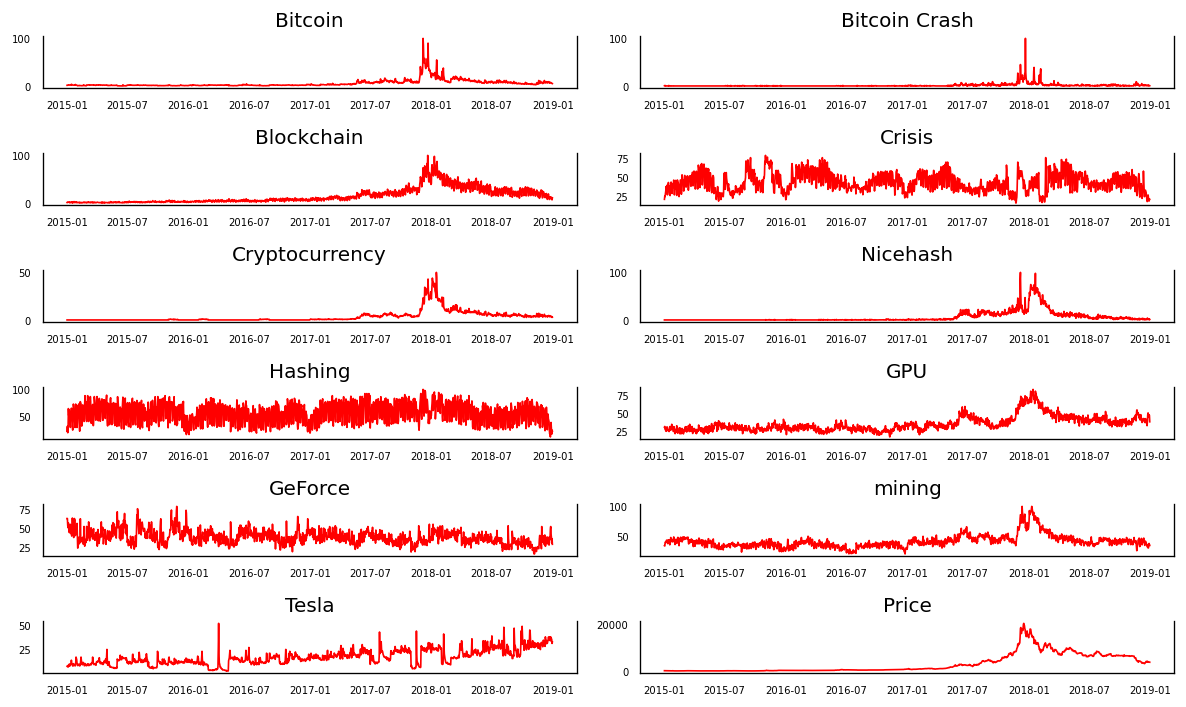

In [3]:
# Plot
fig, axes = plt.subplots(nrows=6, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Testing Causation using Granger’s Causality Test

In [4]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)    

,Bitcoin_x,Bitcoin Crash_x,Blockchain_x,Crisis_x,Cryptocurrency_x,Nicehash_x,Hashing_x,GPU_x,GeForce_x,mining_x,Tesla_x,Price_x
Bitcoin_y,1.0000,0.0000,0.0000,0.0002,0.0000,0.0000,0.0000,0.0000,0.0859,0.0000,0.0333,0.0000
Bitcoin Crash_y,0.0000,1.0000,0.0000,0.2754,0.0000,0.0000,0.0051,0.0000,0.0968,0.0000,0.0028,0.0000
Blockchain_y,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0276,0.0000,0.0033,0.0000
Crisis_y,0.0181,0.0222,0.0000,1.0000,0.0522,0.0073,0.0000,0.0028,0.0000,0.0000,0.0000,0.0075
Cryptocurrency_y,0.0000,0.0000,0.0000,0.0044,1.0000,0.0000,0.0004,0.0000,0.2806,0.0000,0.1222,0.0000
Nicehash_y,0.0000,0.0000,0.0000,0.0311,0.0000,1.0000,0.2302,0.0000,0.5227,0.0000,0.0000,0.0000
Hashing_y,0.0000,0.0106,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0009,0.0000,0.0097,0.0001
GPU_y,0.0000,0.0000,0.0000,0.0005,0.0000,0.0000,0.0000,1.0000,0.0005,0.0000,0.0000,0.0000
GeForce_y,0.1034,0.2334,0.0000,0.0000,0.0350,0.5409,0.0000,0.1138,1.0000,0.0000,0.0000,0.0001
mining_y,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0003,0.0000


# Cointegration Test

In [5]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name            ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col, 15), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name            ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Bitcoin         ::  963.98    > 311.1288  =>   True
Bitcoin Crash   ::  687.59    > 263.2603  =>   True
Blockchain      ::  497.92    > 219.4051  =>   True
Crisis          ::  377.44    > 179.5199  =>   True
Cryptocurrency  ::  280.87    > 143.6691  =>   True
Nicehash        ::  197.94    > 111.7797  =>   True
Hashing         ::  126.9     > 83.9383   =>   True
GPU             ::  80.65     > 60.0627   =>   True
GeForce         ::  42.77     > 40.1749   =>   True
mining          ::  18.88     > 24.2761   =>   False
Tesla           ::  2.6       > 12.3212   =>   False
Price           ::  0.19      > 4.1296    =>   False


# Split the Series into Training and Testing Data

In [6]:
nobs = 20
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)
print(df_test.shape)

(1441, 12)
(20, 12)


# Check for Stationarity and Make the Time Series Stationary

In [7]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
        return True
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 
        return False
# ADF Test on each column
stationary = True
for name, column in df_train.iteritems():
    temp = adfuller_test(column, name=column.name)
    stationary = stationary and temp
    print('\n')
if stationary:
    print('Proceed')
else:
    print('Need differencing')

    Augmented Dickey-Fuller Test on "Bitcoin" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.0878
 No. Lags Chosen       = 24
 Critical value 1%     = -3.435
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0275. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Bitcoin Crash" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.236
 No. Lags Chosen       = 24
 Critical value 1%     = -3.435
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.018. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Blockchain" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signi

## 1st difference

In [8]:
df_differenced = df_train.diff().dropna()
# ADF Test on each column of 1st Differences Dataframe
stationary = True
for name, column in df_differenced.iteritems():
    temp = adfuller_test(column, name=column.name)
    stationary = stationary and temp
    print('\n')
if stationary:
    print('Proceed')
else:
    print('Need differencing')

    Augmented Dickey-Fuller Test on "Bitcoin" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.5574
 No. Lags Chosen       = 23
 Critical value 1%     = -3.435
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Bitcoin Crash" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.8822
 No. Lags Chosen       = 24
 Critical value 1%     = -3.435
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Blockchain" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signific

# Select the Order (P) of VAR model

In [9]:
model = VAR(df_differenced)
x = model.select_order(maxlags=20)
x.summary()

C:\Users\Public\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,41.79,41.84,1.412e+18,41.81
1,40.04,40.62,2.457e+17,40.26
2,39.18,40.29,1.035e+17,39.59
3,38.80,40.45,7.116e+16,39.42
4,38.28,40.46,4.206e+16,39.09
5,37.25,39.96*,1.506e+16,38.26
6,36.74,39.98,9.005e+15,37.95
7,36.50,40.28,7.141e+15,37.91*
8,36.39,40.70,6.355e+15,38.00
9,36.29,41.13,5.772e+15,38.10


# Train the VAR Model of Selected Order(p)

In [10]:
model_fitted = model.fit(20)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 27, Jun, 2022
Time:                     00:14:42
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                    45.1205
Nobs:                     1420.00    HQIC:                   38.4117
Log likelihood:          -45718.6    FPE:                9.15904e+14
AIC:                      34.4111    Det(Omega_mle):     1.39597e+14
--------------------------------------------------------------------
Results for equation Bitcoin
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                     -0.015943         0.049417           -0.323           0.747
L1.Bitcoin                -0.379121         0.054436           -6.965           0.000
L1.Bitcoin Crash           0.050558   

# Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

The value of this statistic can vary between 0 and 4. The closer it is to the value 2, then there is no significant serial correlation. The closer to 0, there is a positive serial correlation, and the closer it is to 4 implies negative serial correlation.

In [11]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

Bitcoin : 2.0
Bitcoin Crash : 2.0
Blockchain : 1.96
Crisis : 1.98
Cryptocurrency : 2.06
Nicehash : 2.0
Hashing : 1.99
GPU : 2.0
GeForce : 1.99
mining : 2.0
Tesla : 1.99
Price : 2.01


# Forecast VAR model using statsmodels

In [12]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

20


array([[-3.96000000e+00, -5.85000000e+00, -8.70000000e+00,
        -7.80000000e+00, -2.10000000e+00, -3.00000000e-01,
        -2.20400000e+01,  5.40000000e+00,  7.80000000e+00,
        -6.24000000e+00, -4.08000000e+00, -4.60898438e+01],
       [ 8.40000000e-01, -1.17000000e+00,  3.19000000e+00,
        -1.20000000e+00,  9.80000000e-01, -1.50000000e+00,
        -2.28000000e+00,  0.00000000e+00,  4.16000000e+00,
         4.32000000e+00,  2.38000000e+00, -2.33220215e+02],
       [-1.20000000e-01,  7.20000000e-01,  2.32000000e+00,
         2.40000000e+00, -7.00000000e-02,  5.00000000e-01,
        -7.60000000e-01, -5.40000000e+00, -8.84000000e+00,
         4.80000000e+00, -3.06000000e+00,  1.66699219e+01],
       [ 4.20000000e+00,  3.15000000e+00, -1.45000000e+00,
         5.40000000e+00,  1.96000000e+00,  9.00000000e-01,
         1.14000000e+01,  1.62000000e+00, -3.12000000e+00,
         9.60000000e-01, -1.02000000e+00, -2.92219727e+02],
       [-9.60000000e-01, -3.60000000e+00,  1.1890000

In [13]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_1d')
df_forecast

,Bitcoin_1d,Bitcoin Crash_1d,Blockchain_1d,Crisis_1d,Cryptocurrency_1d,Nicehash_1d,Hashing_1d,GPU_1d,GeForce_1d,mining_1d,Tesla_1d,Price_1d
date,,,,,,,,,,,,
2018-12-12,-3.296115,-3.230902,-0.605637,-1.053418,0.100747,1.165119,-3.389765,-1.648493,1.215034,-4.199530,-4.845217,-4.336452
2018-12-13,-0.749615,1.440783,-4.773423,-2.963496,-1.145648,-2.545618,-11.606482,-0.300278,3.075074,-0.452346,1.045978,-418.935836
2018-12-14,-0.299128,-1.573218,1.703710,-2.979839,-0.305292,1.334861,-0.813326,-0.558042,1.092261,-2.276579,2.449694,152.004070
2018-12-15,-2.121208,-0.126539,-4.990230,-12.524235,-0.592307,-0.996893,-22.738841,-4.090838,-0.735758,-2.136651,-6.025375,-120.308642
2018-12-16,-1.254699,-0.057191,0.333505,1.353885,-0.132931,0.054699,1.714437,4.955578,1.425971,2.231039,-0.564811,62.378560
2018-12-17,2.351996,0.729881,8.435506,16.126146,1.391527,3.425353,25.048341,-0.788121,-0.256434,1.983223,3.185691,-109.180207
2018-12-18,0.064988,-0.010393,2.695283,6.733246,-0.648280,-3.581562,13.960248,0.992781,-3.195922,1.124508,1.601814,59.762339
2018-12-19,-0.857758,-0.687923,-0.609950,-1.506271,0.163725,1.195021,-2.717596,-0.111287,-0.761079,0.777332,-0.589190,98.921158
2018-12-20,1.352788,0.997225,-4.522531,-2.704063,0.342338,-0.236619,-6.901812,-0.805344,3.456661,-1.330948,-1.504172,-145.341308


# Invert the transformation to get the real forecast

In [14]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [15]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False)
cols = [s + '_forecast' for s in df.columns.values.tolist()]
df_results.loc[:, cols]

,Bitcoin_forecast,Bitcoin Crash_forecast,Blockchain_forecast,Crisis_forecast,Cryptocurrency_forecast,Nicehash_forecast,Hashing_forecast,GPU_forecast,GeForce_forecast,mining_forecast,Tesla_forecast,Price_forecast
date,,,,,,,,,,,,
2018-12-12,4.503885,-1.330902,18.354363,37.226582,3.640747,2.085119,59.310235,40.351507,29.815034,39.040470,29.734783,3508.848607
2018-12-13,3.754271,0.109881,13.580940,34.263086,2.495099,-0.460499,47.703753,40.051228,32.890108,38.588124,30.780761,3089.912771
2018-12-14,3.455143,-1.463337,15.284650,31.283247,2.189808,0.874363,46.890427,39.493187,33.982369,36.311545,33.230455,3241.916841
2018-12-15,1.333935,-1.589877,10.294419,18.759013,1.597501,-0.122531,24.151586,35.402348,33.246611,34.174894,27.205080,3121.608200
2018-12-16,0.079235,-1.647067,10.627924,20.112898,1.464569,-0.067832,25.866023,40.357926,34.672582,36.405933,26.640270,3183.986759
2018-12-17,2.431231,-0.917187,19.063431,36.239044,2.856096,3.357522,50.914364,39.569805,34.416148,38.389156,29.825961,3074.806552
2018-12-18,2.496220,-0.927580,21.758713,42.972290,2.207816,-0.224040,64.874612,40.562586,31.220226,39.513664,31.427775,3134.568891
2018-12-19,1.638461,-1.615503,21.148763,41.466019,2.371541,0.970981,62.157016,40.451298,30.459147,40.290996,30.838585,3233.490050
2018-12-20,2.991249,-0.618278,16.626231,38.761956,2.713879,0.734361,55.255204,39.645955,33.915808,38.960048,29.334413,3088.148741


# Plot of Forecast vs Actuals

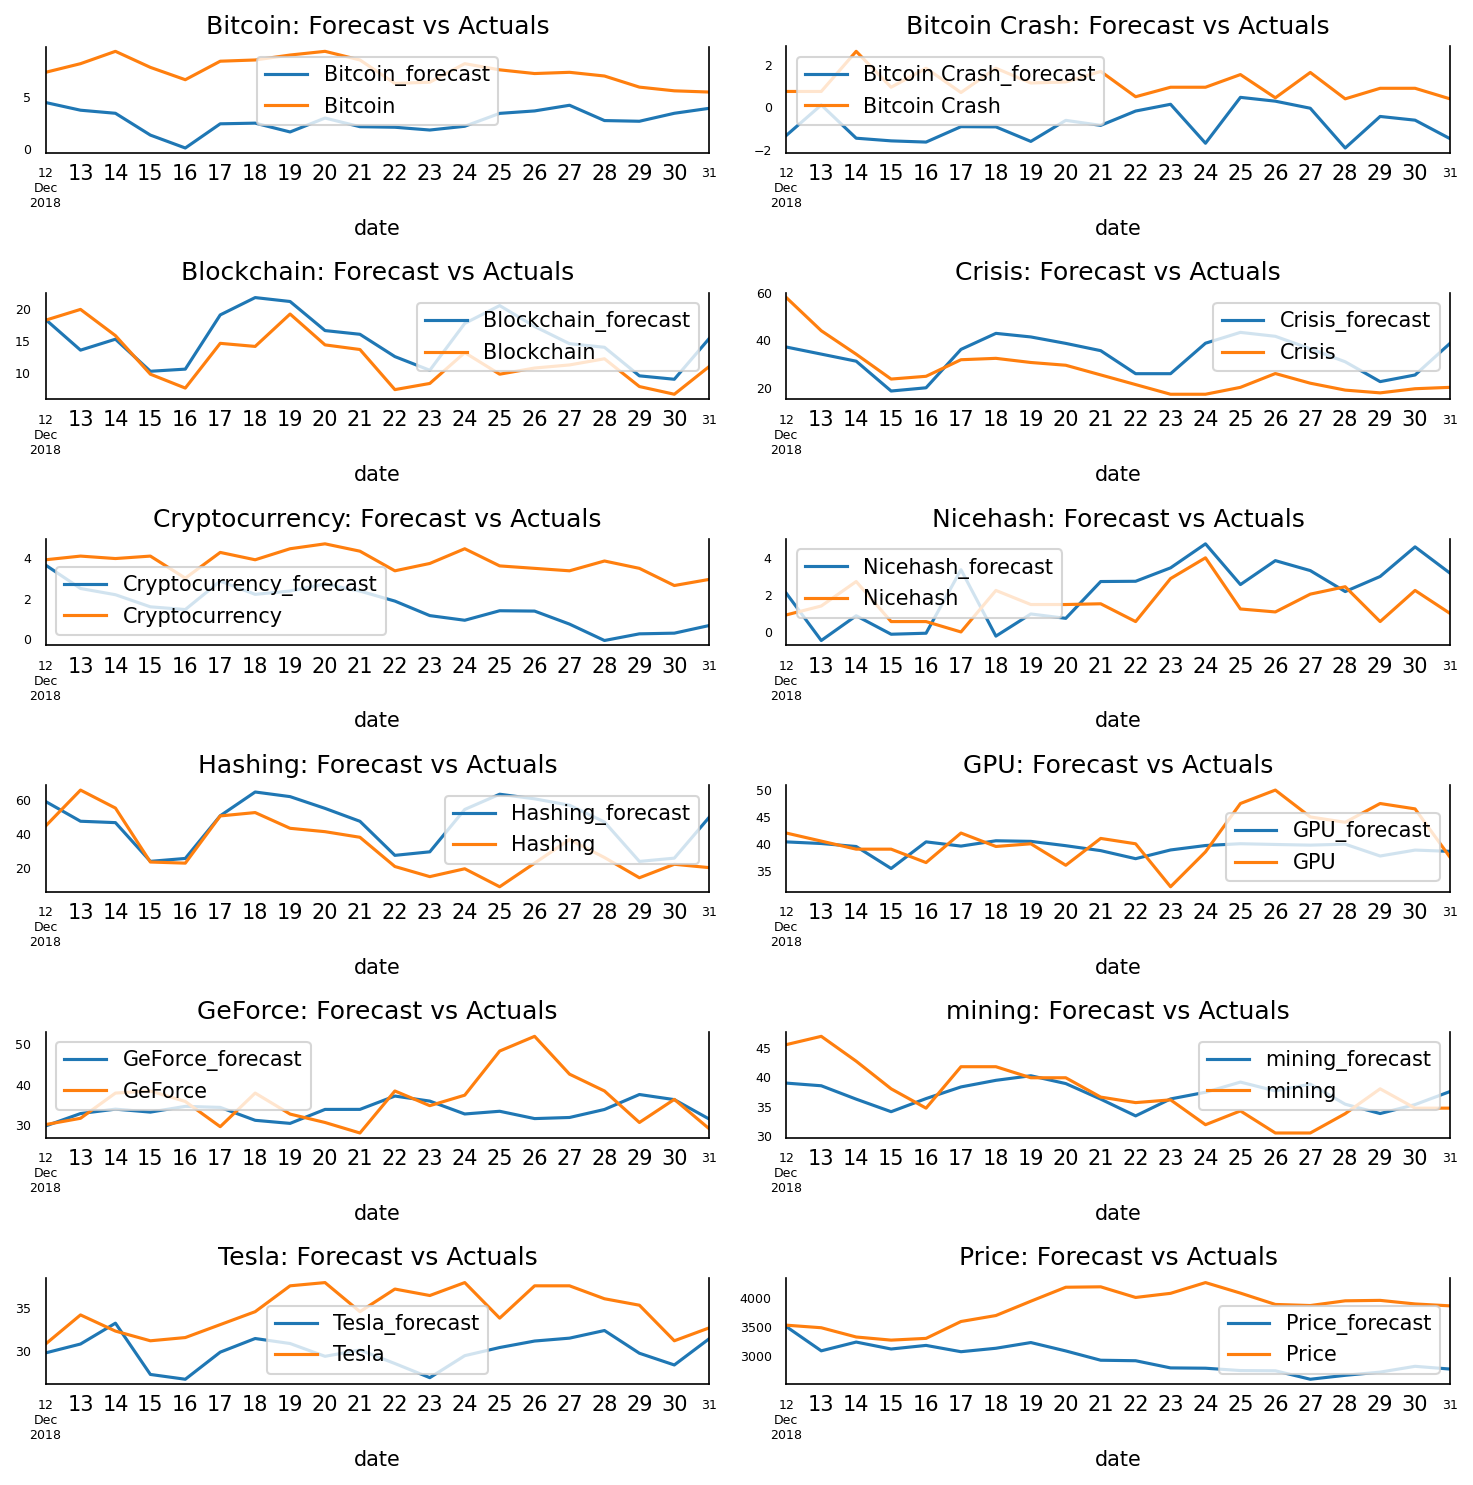

In [16]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Evaluate the Forecasts

In [17]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

In [18]:
for col in df.columns.values.tolist():
    print('\nForecast Accuracy of: ' + col)
    accuracy_prod = forecast_accuracy(df_results[col + '_forecast'].values, df_test[col])
    for k, v in accuracy_prod.items():
        print(k, ': ', round(v,4))


Forecast Accuracy of: Bitcoin
mape :  0.626
me :  -4.845
mae :  4.845
mpe :  -0.626
rmse :  5.1148
corr :  -0.06
minmax :  0.626

Forecast Accuracy of: Bitcoin Crash
mape :  1.9874
me :  -1.9267
mae :  1.9267
mpe :  -1.9874
rmse :  2.161
corr :  -0.0841
minmax :  1.9874

Forecast Accuracy of: Blockchain
mape :  0.3205
me :  2.8752
mae :  3.5646
mpe :  0.2852
rmse :  4.4122
corr :  0.6204
minmax :  0.223

Forecast Accuracy of: Crisis
mape :  0.4505
me :  6.5123
mae :  10.8498
mpe :  0.3434
rmse :  12.4439
corr :  0.2742
minmax :  0.2936

Forecast Accuracy of: Cryptocurrency
mape :  0.5805
me :  -2.1412
mae :  2.1412
mpe :  -0.5805
rmse :  2.2792
corr :  0.5734
minmax :  0.5805

Forecast Accuracy of: Nicehash
mape :  inf
me :  0.6269
mae :  1.5265
mpe :  inf
rmse :  1.7541
corr :  0.2473
minmax :  0.6575

Forecast Accuracy of: Hashing
mape :  0.8134
me :  13.8224
mae :  16.5069
mpe :  0.7703
rmse :  21.2846
corr :  0.4072
minmax :  0.3245

Forecast Accuracy of: GPU
mape :  0.0899
me :  

C:\Users\silly bb\AppData\Local\Temp\ipykernel_28896\3132832150.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
C:\Users\silly bb\AppData\Local\Temp\ipykernel_28896\3132832150.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
